In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS


In [20]:
df1 = pd.read_csv('Clean_Twitter_data.csv')
df2 = pd.read_csv('Clean_Twitter_data1.csv')

In [21]:
# Merge datasets

df = pd.concat([df1, df2], ignore_index=True)
df

,label,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,fashiontrends,What's the outfit tonight? 😏\n⁠\nStreaming Eve...,Whats the outfit tonight \n\nStreaming Everywh...,"['whats', 'the', 'outfit', 'tonight', 'streami...","['whats', 'outfit', 'tonight', 'streaming', 'e...","['what', 'outfit', 'tonight', 'stream', 'every...","['whats', 'outfit', 'tonight', 'streaming', 'e..."
1,fashiontrends,FESTIVE FEATHERS - #fashion #fashionable #fash...,FESTIVE FEATHERS fashion fashionable fashiona...,"['festive', 'feathers', 'fashion', 'fashionabl...","['festive', 'feathers', 'fashion', 'fashionabl...","['festiv', 'feather', 'fashion', 'fashion', 'f...","['festive', 'feather', 'fashion', 'fashionable..."
2,fashiontrends,Our classic cloud slides are the comfiest shoe...,Our classic cloud slides are the comfiest shoe...,"['our', 'classic', 'cloud', 'slides', 'are', '...","['classic', 'cloud', 'slides', 'comfiest', 'sh...","['classic', 'cloud', 'slide', 'comfiest', 'sho...","['classic', 'cloud', 'slide', 'comfiest', 'sho..."
3,fashiontrends,Trendiest Knitwear At Net-A-Porter #fashiontre...,Trendiest Knitwear At NetAPorter fashiontrends...,"['trendiest', 'knitwear', 'at', 'netaporter', ...","['trendiest', 'knitwear', 'netaporter', 'fashi...","['trendiest', 'knitwear', 'netaport', 'fashion...","['trendiest', 'knitwear', 'netaporter', 'fashi..."
4,fashiontrends,"Or like #Celio, a cool, fun-loving and smart o...",Or like Celio a cool funloving and smart one\n...,"['or', 'like', 'celio', 'a', 'cool', 'funlovin...","['like', 'celio', 'cool', 'funloving', 'smart'...","['like', 'celio', 'cool', 'funlov', 'smart', '...","['like', 'celio', 'cool', 'funloving', 'smart'..."
...,...,...,...,...,...,...,...
197,ecommerce,ChocoMars - Multi-Purpose WordPress Theme\n\n\...,ChocoMars MultiPurpose WordPress Theme\n\n\nb...,"['chocomars', 'multipurpose', 'wordpress', 'th...","['chocomars', 'multipurpose', 'wordpress', 'th...","['chocomar', 'multipurpos', 'wordpress', 'them...","['chocomars', 'multipurpose', 'wordpress', 'th..."
198,ecommerce,is for Sale!\n#domain #domainname #domainname...,is for Sale\ndomain domainname domainnamefors...,"['', 'is', 'for', 'sale', 'domain', 'domainnam...","['', 'sale', 'domain', 'domainname', 'domainna...","['', 'sale', 'domain', 'domainnam', 'domainnam...","['', 'sale', 'domain', 'domainname', 'domainna..."
199,ecommerce,WooCommerce Membership *\n\n\n#codecanyon #eco...,WooCommerce Membership \n\n\ncodecanyon ecomme...,"['woocommerce', 'membership', 'codecanyon', 'e...","['woocommerce', 'membership', 'codecanyon', 'e...","['woocommerc', 'membership', 'codecanyon', 'ec...","['woocommerce', 'membership', 'codecanyon', 'e..."
200,ecommerce,How to Create an Omnichannel Fraud Prevention ...,How to Create an Omnichannel Fraud Prevention ...,"['how', 'to', 'create', 'an', 'omnichannel', '...","['create', 'omnichannel', 'fraud', 'prevention...","['creat', 'omnichannel', 'fraud', 'prevent', '...","['create', 'omnichannel', 'fraud', 'prevention..."


In [22]:
df = df[['label','Tweet_lemmatized']]
df.head()

,label,Tweet_lemmatized
0,fashiontrends,"['whats', 'outfit', 'tonight', 'streaming', 'e..."
1,fashiontrends,"['festive', 'feather', 'fashion', 'fashionable..."
2,fashiontrends,"['classic', 'cloud', 'slide', 'comfiest', 'sho..."
3,fashiontrends,"['trendiest', 'knitwear', 'netaporter', 'fashi..."
4,fashiontrends,"['like', 'celio', 'cool', 'funloving', 'smart'..."


In [23]:
final_tweets=[i.replace(",","").replace("[","").replace("]","").replace("'","") for i in df['Tweet_lemmatized']]
final_tweets[0:5]

['whats outfit tonight streaming everywhere link bio saturday weekend sexpositive weekendmood deephouse techhouse spotify theeveningafter lifestyle fashiontrends styleblogger fashioninspo fashion style model painting makeup fashionblogger ',
 'festive feather fashion fashionable fashionaddict fashionblogger fashionbloggers fashiongram fashionicon fashioninspo fashionista fashionistas fashionlove fashionlovers fashionpost fashionstyle fashiontrends feather festive insta ',
 'classic cloud slide comfiest shoe around shop kat cloud slide today yoru fave color minimal heel fashionrevolution black fashiontrends summerfashion fashioninspo vintagefashion glamour cloudshoes slipper ',
 'trendiest knitwear netaporter fashiontrends via youtube knitwear sweater netaporter fashiontrends',
 'like celio cool funloving smart one trendy fashiontrends lookatme ']

In [24]:
df['final_tweets']=final_tweets

/var/folders/q0/hps99sh511n627gdy32s4wlh0000gn/T/ipykernel_52383/3791901592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_tweets']=final_tweets


In [25]:
df=df.drop('Tweet_lemmatized',axis=1)
df.head()

,label,final_tweets
0,fashiontrends,whats outfit tonight streaming everywhere link...
1,fashiontrends,festive feather fashion fashionable fashionadd...
2,fashiontrends,classic cloud slide comfiest shoe around shop ...
3,fashiontrends,trendiest knitwear netaporter fashiontrends vi...
4,fashiontrends,like celio cool funloving smart one trendy fas...


Text(0, 0.5, 'Frequency')

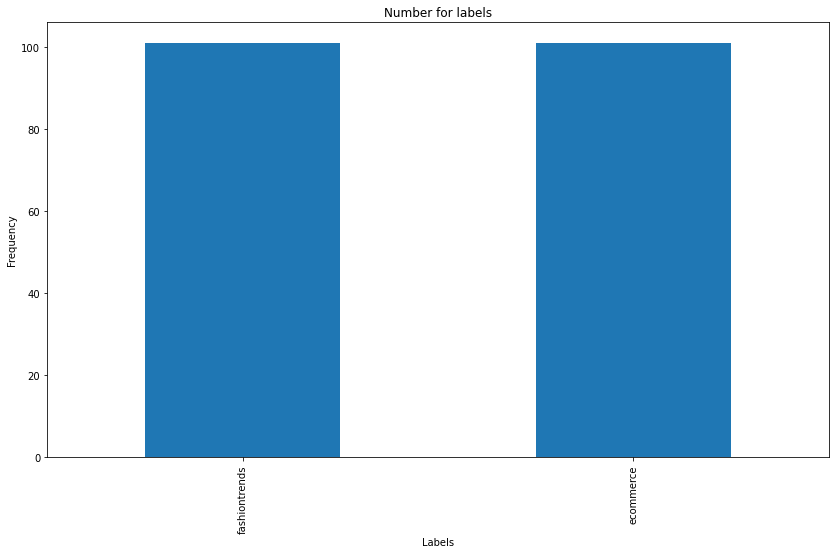

In [26]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

In [27]:
# Separate majority and minority classes

df_majority = df[df.label=='fashiontrends']
df_minority = df[df.label=='ecommerce']

In [28]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.label.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64


fashiontrends    101
ecommerce        101
Name: label, dtype: int64

In [29]:
X=df_downsampled['final_tweets'].values
y=df_downsampled['label'].values


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [31]:
import random as rd
MyCV_content=CountVectorizer(input='content',
                        stop_words='english'
                        #max_features=100
                        )

My_DTM2=MyCV_content.fit_transform(X)
ColNames=MyCV_content.get_feature_names()
My_DF_content=pd.DataFrame(My_DTM2.toarray(),columns=ColNames)


My_DF_content['LABEL'] = pd.DataFrame(y,columns=['LABEL'])
rd.seed(1993)
TrainDF, TestDF = train_test_split(My_DF_content, test_size=0.25)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)

from collections import Counter
Counter(y).keys()
Counter(y).values()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dict_values([101, 101])

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



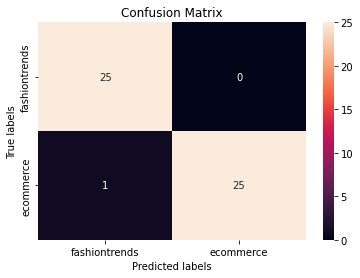

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

MyModelNB= MultinomialNB(alpha = 1)

NB1=MyModelNB.fit(TrainDF, TrainLabels)
Preds = MyModelNB.predict(TestDF)
Pred_Proba = MyModelNB.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds))
cnf_matrix1 = confusion_matrix(TestLabels, Preds)

##Visualise Confusion Matrix
labels = ['fashiontrends', 'ecommerce']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



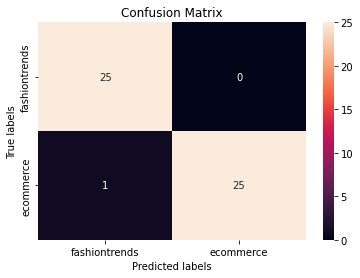

In [40]:
MyModelNB2= MultinomialNB(alpha =3)

NB2=MyModelNB2.fit(TrainDF, TrainLabels)
Preds2 = MyModelNB2.predict(TestDF)
Pred_Proba2 = MyModelNB2.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds2))
cnf_matrix1 = confusion_matrix(TestLabels, Preds2)

##Visualise Confusion Matrix
labels = ['fashiontrends', 'ecommerce']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds2), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        26

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


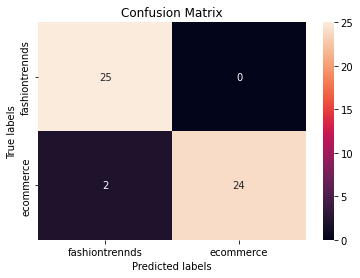

In [34]:
MyModelNB3= MultinomialNB(alpha =0)

NB3=MyModelNB3.fit(TrainDF, TrainLabels)
Preds3 = MyModelNB3.predict(TestDF)
Pred_Proba3 = MyModelNB3.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds3))
cnf_matrix1 = confusion_matrix(TestLabels, Preds3)

##Visualise Confusion Matrix
labels = ['fashiontrennds', 'ecommerce']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

In [35]:
class_0_prob_sorted = NB1.feature_log_prob_[0, :].argsort()[::-1]
class_1_prob_sorted = NB1.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:10]))
word_cloud_0 = Counter(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:10])) 
word_cloud_1 = Counter(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:20]))


['ecommerce' 'business' 'amazon' 'seller' 'addtocart' 'shopify'
 'marketing' 'trending' 'logo' 'retail']
['fashiontrends' 'fashion' 'fashionblogger' 'fashionstyle' 'woman'
 'accessory' 'fashiondesigner' 'clothing' 'fashionaddict' 'holla']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


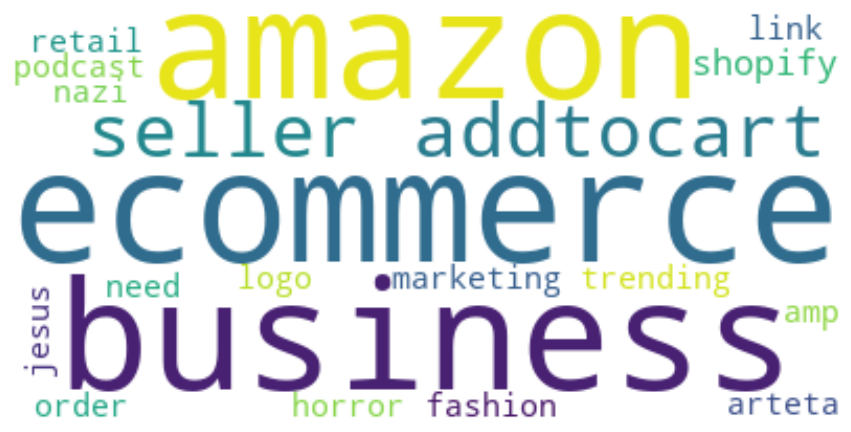

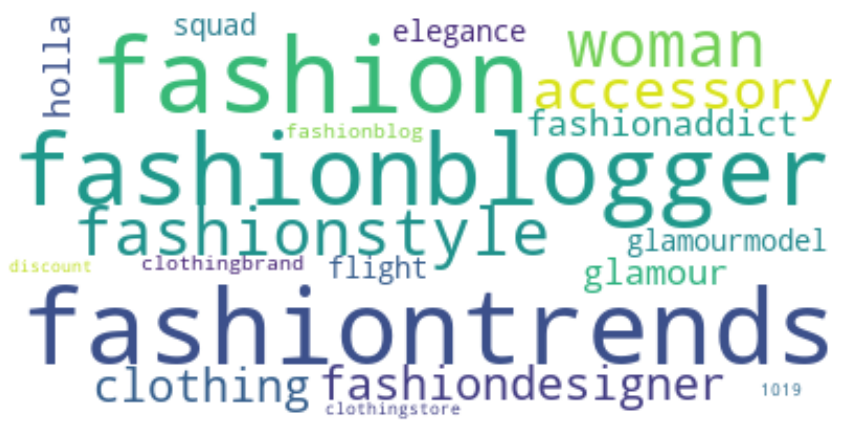

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white').fit_words(word_cloud_0)

fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")




wordcloud = WordCloud(background_color='white').fit_words(word_cloud_1)

fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")